<a href="https://colab.research.google.com/github/sadberyy/ship-air-cushion/blob/main/oneLabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-3-578b7085e158>:20: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc1 = Arc((x[0], x[2]), 2*r1, 2*r1, 0, (alfa - x[3])*180/np.pi, alfa*180/np.pi, color = 'black')
<ipython-input-3-578b7085e158>:22: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc2 = Arc((x[1], x[2]), 2*r2, 2*r2, 270, 0, x[4]*180/np.pi, color = 'black')


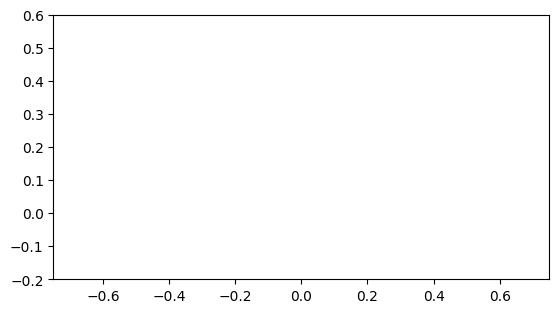

In [ ]:
from matplotlib.patches import Arc
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera 

def X(x):
  f = np.zeros(5, dtype=np.float64)
  f[0] = x[0] + x[2]*np.cos(alfa - x[3]) - A_x
  f[1] = x[1] + x[2]*np.cos(alfa + x[4]) - B_x
  f[2] = x[2] + x[2]*np.sin(alfa - x[3]) - A_y
  f[3] = (x[3] + x[4])*x[2] + (x[1] - x[0]) - C
  f[4] = x[2] + x[2]*np.sin(alfa + x[4]) - B_y
  return f

def draw(x):
  r1 = ((x[0] - A_x)**2 + (x[2] - A_y)**2)**0.5
  r2 = ((x[1] - B_x)**2 + (x[2] - B_y)**2)**0.5
  plt.plot((A_x, B_x), (A_y, B_y), color = 'black')
  plt.plot((x[0], x[1]), (x[2] - r1, x[2] - r2), color = 'black')
  arc1 = Arc((x[0], x[2]), 2*r1, 2*r1, 0, (alfa - x[3])*180/np.pi, alfa*180/np.pi, color = 'black')
  ax.add_patch(arc1)
  arc2 = Arc((x[1], x[2]), 2*r2, 2*r2, 270, 0, x[4]*180/np.pi, color = 'black')
  ax.add_patch(arc2)

if __name__ == "__main__":
  A_x = -0.353
  B_x = 0.353
  A_y = 0.3
  B_y = 0.3
  C = 3*np.pi / 8
  alfa = 3*np.pi / 2
  eps = 0.000000000001

  p = 2000
  m = 100
  v = 0
  t = 0.01
  g = 9.8

  fig = plt.figure()
  camera = Camera(fig)
  ax = plt.gca()
  ax.set_ylim(-0.2, 0.6)
  ax.set_xlim(-0.75, 0.75)
  ax.set_aspect("equal")
  ax.axis('on')

  for i in range(250):
    A_y = A_y + v*t
    B_y = A_y

    x = np.zeros(5, dtype=np.float64)
    x1 = np.zeros(5, dtype=np.float64)
    f0 = 1
    while f0:
      F = X(x)
      x1 = x - F*0.005
      f1 = 0
      for j in range (0, 5):
        if (abs(F[j]) > eps):
          f1 = 1
          break
      if (f1 == 0):
        f0 = 0
      x = x1
    
    l = x[1] - x[0]
    v = v + (1/m)*(p*l-m*g)*t
    draw(x)
    camera.snap()
    
  animation = camera.animate(interval = 200, repeat = True, repeat_delay = 0)
  animation.save('podushka.mp4')